### Inspecting Datasets

In [1]:
# Load libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Datasets
food_consumption=pd.read_csv('food_consumption.csv', index_col='Unnamed: 0')
print(food_consumption.head(), end='\n \n')
print('_____'*10)
#See the shape of the Data Frame 
print(f'Data Shape is : {food_consumption.shape}\nNumber of rows is : {food_consumption.shape[0]}\nNumber of culomns is : {food_consumption.shape[1]}')

     country food_category  consumption  co2_emission
1  Argentina          pork        10.51         37.20
2  Argentina       poultry        38.66         41.53
3  Argentina          beef        55.48       1712.00
4  Argentina     lamb_goat         1.56         54.63
5  Argentina          fish         4.36          6.96
 
__________________________________________________
Data Shape is : (1430, 4)
Number of rows is : 1430
Number of culomns is : 4


In [3]:
# See some useful informations such as (NaNs, Name of columns and type of variables)
print(food_consumption.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430 entries, 1 to 1430
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emission   1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 55.9+ KB
None


In [4]:
# See some DataFrame statiscis 
print(food_consumption.describe())

       consumption  co2_emission
count  1430.000000   1430.000000
mean     28.110406     74.383993
std      49.818044    152.098566
min       0.000000      0.000000
25%       2.365000      5.210000
50%       8.890000     16.530000
75%      28.132500     62.597500
max     430.760000   1712.000000


### Mean vs. median

In [5]:
# Filter for Belgium
be_consumption = food_consumption[food_consumption['country'] == 'Belgium']

# Filter for USA
usa_consumption = food_consumption[food_consumption['country'] == 'USA']

# Calculate mean and median consumption in Belgium
print(np.mean(be_consumption['consumption']))
print(np.median(be_consumption['consumption']))

# Calculate mean and median consumption in USA
print(np.mean(usa_consumption['consumption']))
print(np.median(usa_consumption['consumption']))

42.13272727272727
12.59
44.650000000000006
14.58


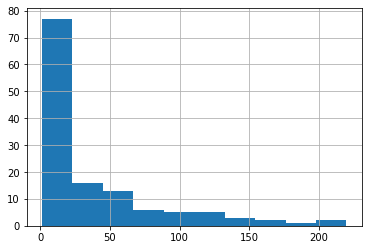

In [6]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Histogram of co2_emission for rice and show plot
rice_consumption['co2_emission'].hist()
plt.show()

### Quartiles, quantiles, and quintiles

In [7]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.25, 0.5, 0.75, 1]))

[   0.        5.21     16.53     62.5975 1712.    ]


### Variance and standard deviation

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


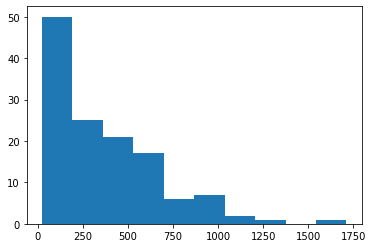

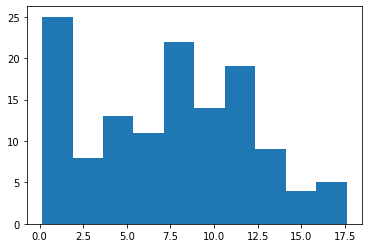

In [8]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg(['var', 'std']))

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Create histogram of co2_emission for food_category 'beef'
plt.hist(food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'])
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
plt.hist(food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'])
# Show plot
plt.show()

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64


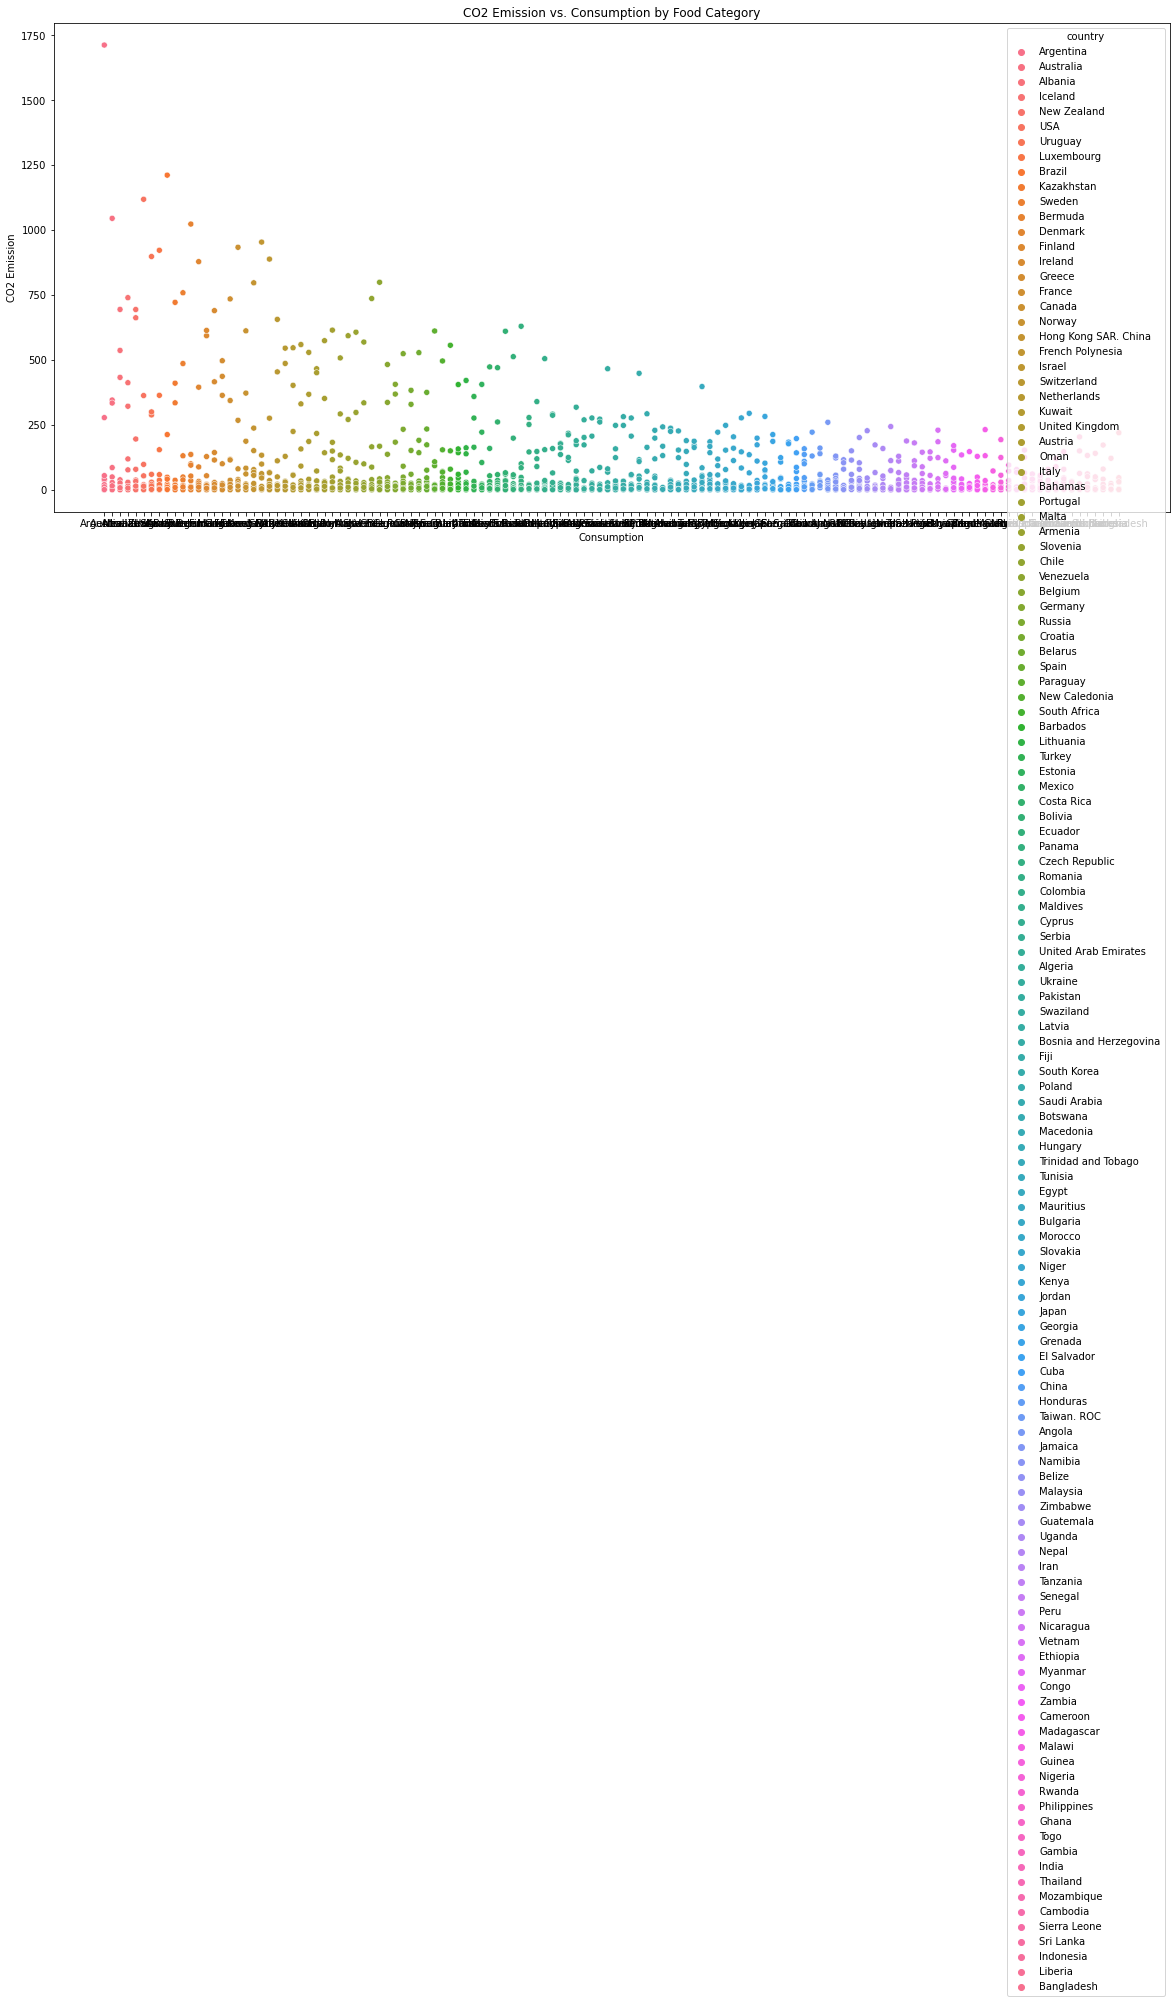

In [9]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()
print(emissions_by_country)

# Plot the bar graph
plt.figure(figsize=(20,9))
sns.scatterplot(data=food_consumption, x='country', y='co2_emission', hue='country')

# Set labels and title
plt.xlabel('Consumption')
plt.ylabel('CO2 Emission')
plt.title('CO2 Emission vs. Consumption by Food Category')

# Display the plot
plt.show()

### Calculating probabilities

In [10]:
# Import amir_deals dataset
amir_deals=pd.read_csv('amir_deals.csv', index_col='Unnamed: 0')
#quick data exploration
print(amir_deals.head(), end='\n \n')
print('----'*12)
print('Data Shape : ->\t', amir_deals.shape)
print('rows_num :   ->\t', amir_deals.shape[0])
print('Col_num :    ->\t', amir_deals.shape[1])
print('----'*12)

     product   client status   amount  num_users
1  Product F  Current    Won  7389.52         19
2  Product C      New    Won  4493.01         43
3  Product B      New    Won  5738.09         87
4  Product I  Current    Won  2591.24         83
5  Product E  Current    Won  6622.97         17
 
------------------------------------------------
Data Shape : ->	 (178, 5)
rows_num :   ->	 178
Col_num :    ->	 5
------------------------------------------------


### Calculating probabilities

In [11]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()
print(counts)

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64


### Sampling deals

In [12]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

       product   client status   amount  num_users
128  Product B  Current    Won  2070.25          7
149  Product D  Current    Won  3485.48         52
78   Product B  Current    Won  6252.30         27
105  Product D  Current    Won  4110.98         39
167  Product C      New   Lost  3779.86         11


### Simulating sales deals

In [13]:
#Calculate the probability that Amir has to wait between 10 and 20 minutes, and store in a variable called prob_between_10_and_20.
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

prob_between_10_and_20 = uniform.cdf(20, loc=min_time, scale=max_time - min_time) - uniform.cdf(10, loc=min_time, scale=max_time - min_time)

prob_20_10 = "{:.3f}".format(prob_between_10_and_20*100)

print(f"the probability that Amir has to wait between 10 and 20 minutes {prob_20_10} %")

the probability that Amir has to wait between 10 and 20 minutes 33.333 %


In [14]:
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

# Simulate 52 weeks of 3 deals
deals = binom.rvs(3, 0.3, size=52)

# Print mean deals won per week
print('-----'*12)
print("average deals won per week                       \t{:.2f} %".format(np.mean(deals)*100))
print('-----'*12)

# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3,3, 0.3)
print("Probability of closing 3 out of 3 deals          \t{:.2f} %".format(prob_3))
print('-----'*12)

# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1, 3, 0.3)

print("Probability of closing <= 1 deal out of 3 deals \t{:.2f} %".format(prob_less_than_or_equal_1))
print('-----'*12)

# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1-binom.cdf(1, 3, 0.3)

print("Probability of closing > 1 deal out of 3 deals   \t{:.2f} %".format(prob_greater_than_1))
print('-----'*12)

------------------------------------------------------------
average deals won per week                       	82.69 %
------------------------------------------------------------
Probability of closing 3 out of 3 deals          	0.03 %
------------------------------------------------------------
Probability of closing <= 1 deal out of 3 deals 	0.78 %
------------------------------------------------------------
Probability of closing > 1 deal out of 3 deals   	0.22 %
------------------------------------------------------------


In [15]:
# Expected number won with 30% win rate
won_30pct = 3 * 0.3
print('{:.2f}'.format(won_30pct))

0.90


In [16]:
# Expected number won with 25% win rate
won_25pct = 3 * 0.25
print("{:.2}".format(won_25pct))

0.75


In [17]:
# Expected number won with 35% win rate
won_35pct = 3 * 0.35
print("{:.2}".format(won_35pct))

1.0
